# Clustering
Clustering is the process of grouping similar data points together such that data points in the same groups are more similar to other data points in that group than those in other groups.

The aim is to divide groups with similar characteristics and assign them to clusters. This will give us insights into the underlying patterns of the different groups/clusters.

In [136]:
import numpy as np
print("numpy - {}".format(np.__version__))
import pandas as pd
print("pandas - {}".format(pd.__version__))
import nltk
print("nltk - {}".format(nltk.__version__))
import sklearn
print("sklearn - {}".format(sklearn.__version__))
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
# print("matplotlib - {}".format(plt.__version__))
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
print("seaborn - {}".format(sns.__version__))

numpy - 1.19.5
pandas - 1.3.3
nltk - 3.5
sklearn - 0.24.2
seaborn - 0.11.0


Lets import the dataset.

In [143]:
# import dataset
df = pd.read_csv("steam_game_data.csv")
print(df.shape)

(77811, 22)


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77811 entries, 0 to 77810
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   77811 non-null  int64  
 1   title                        77804 non-null  object 
 2   hyperlink                    77811 non-null  object 
 3   is game                      77811 non-null  object 
 4   Genres                       77811 non-null  object 
 5   main_genre                   77811 non-null  object 
 6   sub_genre                    77811 non-null  object 
 7   price_in_rand                77811 non-null  float64
 8   discount_price               77811 non-null  float64
 9   discount_percent             77811 non-null  int64  
 10  release_date                 77564 non-null  object 
 11  reviews                      77811 non-null  object 
 12  tags                         77811 non-null  object 
 13  developer       

# Natural Language Processing

Lets start off by dropping all the features we will not be using and removing any noise from the data.
Also because the data we are using are just tags we do not have to worry about removing stop words.

Might look into applying Stemming Lemmatisation to our text.

In [145]:
# keeping relavent features
df = df[['title','tags']]
df.head()

,title,tags
0,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive..."
1,Apex Legends™,"['Free to Play', 'Multiplayer', 'Battle Royale..."
2,Stray,"['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'At..."
3,Grand Theft Auto V,"['Open World', 'Action', 'Multiplayer', 'Autom..."
4,MultiVersus,"['Multiplayer', 'Co-op', '2D Fighter', 'Action..."


Lets start off by removing all the unwanted punctuation from the features i.e "noise".

In [148]:
import string
print(string.punctuation)

# def remove_punctuation(post):
#     return ''.join([l for l in post if l not in string.punctuation])

def remove_punctuation(tags):
    return tags.replace('[','').replace(']','').replace("'",'')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [149]:
# apply funtion to column
df['tags'] = df['tags'].apply(remove_punctuation)
df.head()

,title,tags
0,Counter-Strike: Global Offensive,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,Apex Legends™,"Free to Play, Multiplayer, Battle Royale, Shoo..."
2,Stray,"Cats, Adventure, Cyberpunk, Cute, Atmospheric,..."
3,Grand Theft Auto V,"Open World, Action, Multiplayer, Automobile Si..."
4,MultiVersus,"Multiplayer, Co-op, 2D Fighter, Action, Compet..."


In [150]:
df['tags'][4]

'Multiplayer, Co-op, 2D Fighter, Action, Competitive, "Beat em up", Fantasy, Cartoon, 2D Platformer, 2D, Colorful, Hand-drawn, 1980s, Comic Book, Funny, Superhero, Memes, "1990s", Free to Play, Character Customization'

In [151]:
# return amount of tags a game has
def tag_count(tags_column):
    tags = tags_column.split()
    return len(tags)

In [152]:
df['tag count'] = df['tags'].apply(tag_count)

In [153]:
# summary statistics
df['tag count'].describe()

count    77811.000000
mean        12.297503
std          9.461670
min          0.000000
25%          4.000000
50%          9.000000
75%         22.000000
max         37.000000
Name: tag count, dtype: float64

In [154]:
# drop tag count
df.drop('tag count',axis=1,inplace=True)

### Text Feature Extraction

TFIDF vectorization

In [174]:
# tokenizer
def tokenizer(str_input):
    tags = str_input.lower().split(',')
    return [tag.strip() for tag in tags]

In [182]:
# create instance of vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer,ngram_range=(1,2),max_features=500) #  ngram_range=(1,2),
X = vectorizer.fit_transform(df.tags).toarray()

In [183]:
X.shape

(77811, 500)

In [184]:
# printing mix and mix
print(np.max(X))
print(np.min(X))

1.0
0.0


In [185]:
# list of feature names
features = vectorizer.get_feature_names()
features[:100]

['"1990s"',
 '"beat em up"',
 '"shoot em up"',
 '1980s',
 '2.5d',
 '2d',
 '2d anime',
 '2d colorful',
 '2d cute',
 '2d fighter',
 '2d indie',
 '2d minimalist',
 '2d pixel graphics',
 '2d platformer',
 '2d platformer 2d',
 '2d retro',
 '2d singleplayer',
 '2d top-down',
 '3d',
 '3d colorful',
 '3d cute',
 '3d fighter',
 '3d first-person',
 '3d platformer',
 '3d third person',
 '3d vision',
 '4 player local',
 '4x',
 '6dof',
 'abstract',
 'action',
 'action adventure',
 'action arcade',
 'action casual',
 'action fps',
 'action free to play',
 'action gore',
 'action indie',
 'action multiplayer',
 'action pixel graphics',
 'action platformer',
 'action roguelike',
 'action rpg',
 'action shooter',
 'action simulation',
 'action singleplayer',
 'action strategy',
 'action violent',
 'action-adventure',
 'addictive',
 'adventure',
 'adventure action',
 'adventure action-adventure',
 'adventure casual',
 'adventure free to play',
 'adventure horror',
 'adventure indie',
 'adventure platfor

In [187]:
from sys import getsizeof

# size in  bytes, mb
print(getsizeof(X))
print(round(getsizeof(X) / 1000000,2))

311244112
311.24


# Dimensionality reduction

In [188]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
# pca.explained_variance_ratio_

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

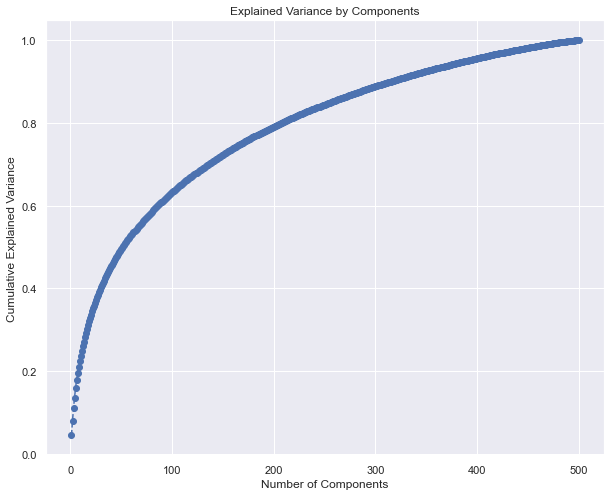

In [189]:
# plot pca variance
pca_len = len(pca.explained_variance_ratio_)

plt.figure(figsize=(10,8))
plt.plot(range(1,pca_len+1),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# dont forget to update


Here we can see that 100% of the variance is explained by under 80% of the features. So we can drop more then 20% of the features, reducing the complexity of the dataset.
<br/>

Text(0, 0.5, 'Cumulative Explained Variance')

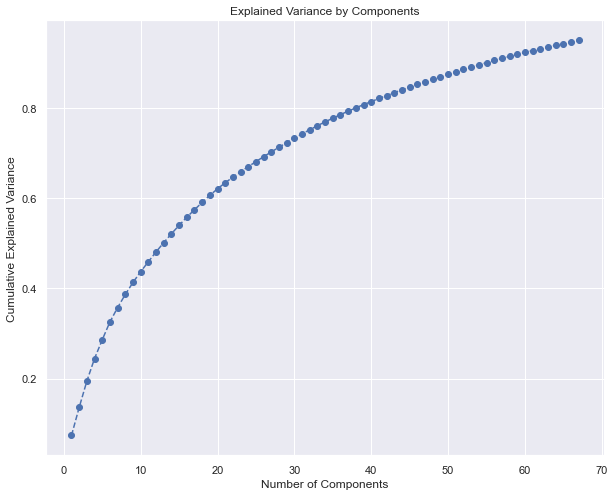

In [119]:
# setting pca to 95%
pca = PCA(.95)
X = pca.fit_transform(X)


# plot pca variance
pca_len = len(pca.explained_variance_ratio_)

plt.figure(figsize=(10,8))
plt.plot(range(1,pca_len+1),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Kmeans Clustering

In [120]:
# avoid kmeans memory leak
import os
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### How to determine the optimal K

These methods are:

- The Elbow Method
- The Silhouette Method


### The Elbow Method
This is probably the most well-known method for determining the optimal number of clusters. 

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

Within-Cluster-Sum of Squared Errors sounds a bit complex. Let’s break it down:

- The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
- The WSS score is the sum of these Squared Errors for all the points.
- Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.
Let us implement this in Python using the sklearn library and our own function for calculating WSS for a range of values for k.


### The Silhouette Method


The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

The Silhouette Value s(i) for each data point i is defined as follows:


Source: Wikipedia
Note: s(i) is defined to be equal to zero if i is the only point in the cluster. This is to prevent the number of clusters from increasing significantly with many single-point clusters.

Here, a(i) is the measure of similarity of the point i to its own cluster. It is measured as the average distance of i from other points in the cluster.


Source: Wikipedia
Similarly, b(i) is the measure of dissimilarity of i from points in other clusters.


Source: Wikipedia
d(i, j) is the distance between points i and j. Generally, Euclidean Distance is used as the distance metric.

The Silhouette score can be easily calculated in Python using the metrics module of the sklearn library.

A high Silhouette Score is desirable. The Silhouette Score reaches its global maximum at the optimal k. This should ideally appear as a peak in the Silhouette Value-versus-k plot.

In [121]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k, random_state=1).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = kmeans.inertia_

        sse.append((curr_sse, k))
        df = pd.DataFrame(sse, columns=['WSS', 'K'])
    return df

# function returns SS score for k values from 1 to kmax
def calculate_SS(X, kmax):
    sil = []
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(X)
        labels = kmeans.labels_
        sil.append((silhouette_score(X, labels, metric='euclidean'), k))

    ss = pd.DataFrame(sil, columns=['Silhouette Score', 'K'])
    return ss

In [122]:
# calculate scores
# data shape
# X = X[:10000]
print(X.shape)

k = 50
wss = calculate_WSS(X, k)
ss = calculate_SS(X, k)

(77811, 67)


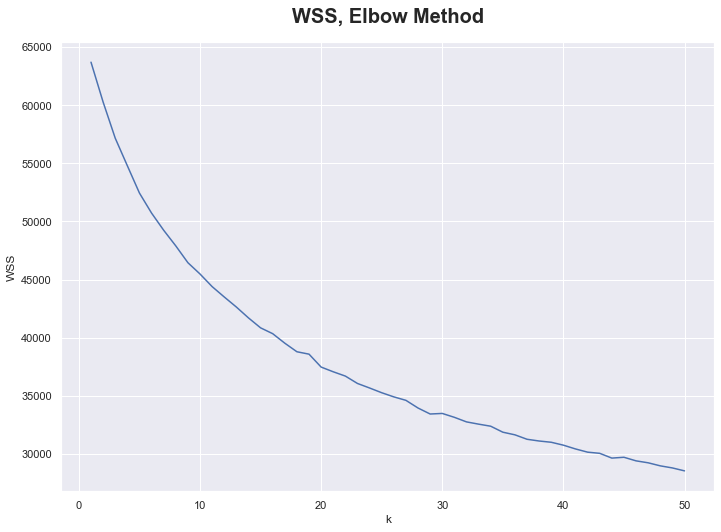

In [123]:
# plotting wss
sns.lineplot(data=wss, x='K', y='WSS')
plt.title("WSS, Elbow Method",
          fontweight='bold', fontsize=20, pad=20)
plt.xlabel("k")
plt.ylabel("WSS")
plt.show()

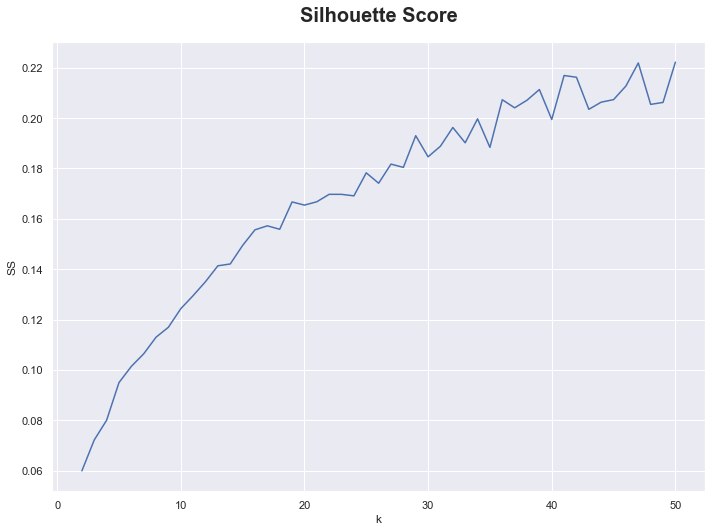

In [124]:
# plot ss score
sns.lineplot(data=ss, x='K',y='Silhouette Score')
plt.title("Silhouette Score",
          fontweight='bold', fontsize=20, pad=20)
plt.xlabel("k")
plt.ylabel("SS")
plt.show()

In [125]:
# k where ss is at its highest
ss_max = ss['Silhouette Score'].max()
optimal_k = ss[ss['Silhouette Score'] == ss_max]['K'].item()
optimal_k

50

The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.

Therefore, the Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal K. Rather they are tools to be used together for a more confident decision.

In [126]:
kmeans = KMeans(random_state=1,n_clusters=optimal_k,verbose=0)
clusters = kmeans.fit_predict(X)

Adding which cluster a game belongs too back to the dataset.

In [127]:
df['cluster'] = clusters

In [128]:
df.head()

,title,tags,cluster
0,Counter-Strike: Global Offensive,FPS Shooter Multiplayer Competitive Action Tea...,28
1,Apex Legends™,Free to Play Multiplayer Battle Royale Shooter...,31
2,Stray,Cats Adventure Cyberpunk Cute Atmospheric Expl...,34
3,Grand Theft Auto V,Open World Action Multiplayer Automobile Sim C...,31
4,MultiVersus,Multiplayer Coop 2D Fighter Action Competitive...,7


In [111]:
df[df['cluster']==22].head(10)

,title,tags,cluster
0,Counter-Strike: Global Offensive,FPS Shooter Multiplayer Competitive Action Tea...,22
25,It Takes Two,Coop Multiplayer Split Screen Puzzle Local CoO...,22
26,F1® 22,Racing Sports Multiplayer Coop VR Singleplayer...,22
41,Monster Hunter Rise: Sunbreak,Action Multiplayer Coop Character Customizatio...,22
46,NBA 2K22,Sports Basketball Simulation Realistic Multipl...,22
49,FIFA 22,Soccer Sports Multiplayer Competitive Football...,22
56,Garry's Mod,Sandbox Multiplayer Funny Moddable Building Co...,22
63,Tiny Tina's Wonderlands,Adventure Loot Shooter FPS Multiplayer Fantasy...,22
69,Cuphead,Difficult Cartoon Platformer Coop Great Soundt...,22
126,Human: Fall Flat,Coop Funny Puzzle Adventure Physics Action San...,22


Here we can see that there is a problem already. CSGO, Stray and raft are completely different styles of games. So the k value is inc